In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [39]:
E_commerce_data = pd.read_csv("C:\\Users\\User\\Documents\\PDS_PROJ_PIC\\ECOMMERCE.csv")

In [40]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)":"C_service"}, axis = 1)

In [41]:
E_commerce_data

,Timestamp,Age,Gender,Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",Do you generally find various alternatives for the same product in your affordable range?,C_service,Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,On a scale of 0-5 how much will you prefer others for online shopping?,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Which e-commerce sites you prefer for buying grocery items?,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10-04-2021 16:24,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10-05-2021 10:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10-05-2021 11:15,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10-05-2021 11:26,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10-05-2021 16:43,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,10-07-2021 08:41,17,Male,Secondary,Yes,"Electronics, Garments",5,Yes,5,Never,Almost same,4,5,3,Amazon,Myntra,Prefer not to buy,NaN,NaN
108,10-07-2021 12:04,17,Female,Secondary,No,Electronics,1,Yes,3,Never,Almost same,3,0,0,Flipkart,Amazon,Big Basket,NaN,NaN
109,10/17/2021 18:20:50,19,Female,Higher Secondary,Yes,"Garments, Educational Materials, Fashion Product",3,Yes,3,Some times,Offline Price is greater,4,8,4,Flipkart,Amazon,Flipkart,NaN,NaN
110,10/21/2021 19:46:31,21,Male,Post Graduate and above,No,"Electronics, Educational Materials",3,Yes,4,Some times,Online Price is greater,5,12,5,Amazon,Amazon,Prefer not to buy,NaN,NaN


In [42]:
data = pd.DataFrame(columns=["Qualification","Subscription",'subscription'])

In [43]:

data.Subscription = E_commerce_data["Do you have any subscription on any E-Commerce site?"]
data.Qualification=E_commerce_data['Qualification']
data.subscription=E_commerce_data['Gender']

In [44]:
data

,Qualification,Subscription,subscription
0,Graduate,Yes,Male
1,Graduate,Yes,Male
2,Graduate,Yes,Male
3,Graduate,Yes,Male
4,Higher Secondary,No,Male
...,...,...,...
107,Secondary,Yes,Male
108,Secondary,No,Female
109,Higher Secondary,Yes,Female
110,Post Graduate and above,No,Male


In [45]:
data1=data.groupby(['Qualification','Subscription']).count()

In [46]:
data1

subscription
Qualification           Subscription              
Graduate                No                      38
                        Yes                     35
Higher Secondary        No                      13
                        Yes                      8
Post Graduate and above No                       5
                        Yes                      4
Secondary               No                       6
                        Yes                      3

In [47]:
data2 = pd.DataFrame(columns=["Qualification","subscription"])
row_list = []
for i,j in data1.index:
    dict1 = {}
    dict1.update({"Qualification": i, "Subscription":j})
    row_list.append(dict1)
df1 = pd.DataFrame(row_list); df1    

,Qualification,Subscription
0,Graduate,No
1,Graduate,Yes
2,Higher Secondary,No
3,Higher Secondary,Yes
4,Post Graduate and above,No
5,Post Graduate and above,Yes
6,Secondary,No
7,Secondary,Yes


In [48]:
df1["total_subscription"] = list(data1.subscription)

In [49]:
df1["Avg_total_subscription"] = df1.groupby("Qualification").transform(lambda x: (x*100)/x.sum())

In [50]:
df1

,Qualification,Subscription,total_subscription,Avg_total_subscription
0,Graduate,No,38,52.054795
1,Graduate,Yes,35,47.945205
2,Higher Secondary,No,13,61.904762
3,Higher Secondary,Yes,8,38.095238
4,Post Graduate and above,No,5,55.555556
5,Post Graduate and above,Yes,4,44.444444
6,Secondary,No,6,66.666667
7,Secondary,Yes,3,33.333333


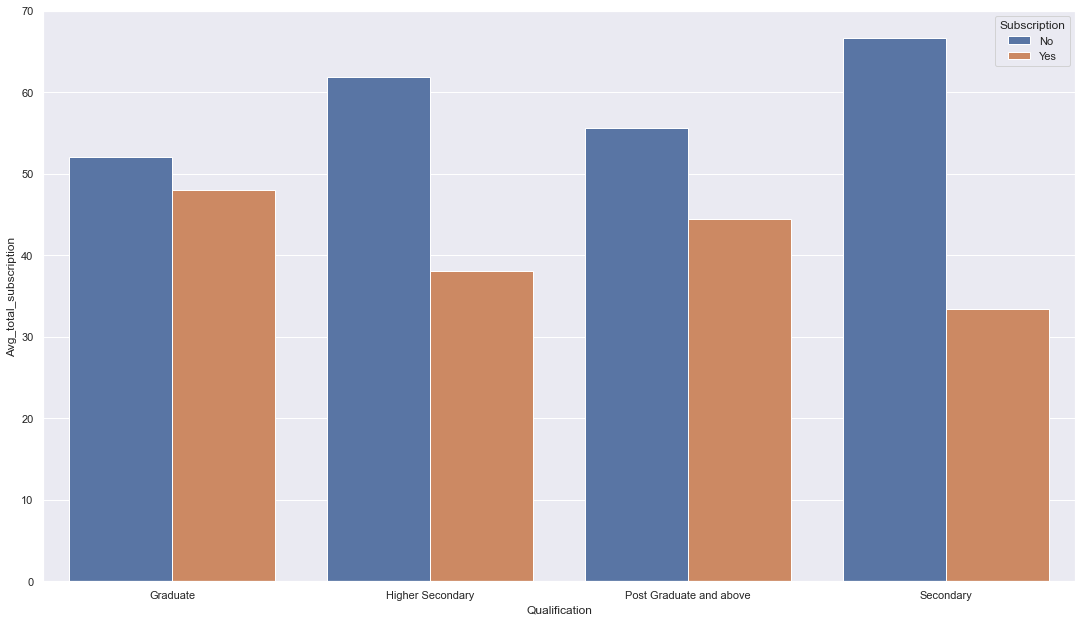

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5, forward = True)
sns.barplot(x = 'Qualification', y = 'Avg_total_subscription',
           data = df1,
           hue = 'Subscription')
fig.savefig('4(b).png',facecolor='lightgrey',transparent=True)